In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### 图像梯度，sobel算子
- 计算结果默认只保留正值，而忽略负值，所以需要对结果求绝对值
- 分别求x方向和y方向的梯度，然后将结果相加，比直接将x和y设置成1的效果要好

In [ ]:
def cv_show(img, title='Image'):
    cv2.imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
img= cv2.imread('pie.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
# 求x方向的梯度
sorbelx= cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3) # cv2.CV_64F enhances the output image to 64-bit float so to keep the negative values

In [12]:
cv_show(sorbelx, 'Sobel X')

In [13]:
sorbelx= cv2.convertScaleAbs(sorbelx)

In [14]:
cv_show(sorbelx, 'Sobel X')

In [16]:
# 求y方向的梯度
sorbely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sorbely= cv2.convertScaleAbs(sorbely)

In [17]:
cv_show(sorbely, 'Sobel Y')

In [18]:
# 将x和y方向的梯度合并
sorbelxy = cv2.addWeighted(sorbelx, 0.5, sorbely, 0.5, 0)

In [27]:
cv_show(sorbelxy, 'Sobel XY')

### 图像梯度，Scharr算子， laplacian算子
- Scharr算子比sobel算子更敏感
- laplacian算子，中间点对周边点的比较。对噪音点更敏感，通常和气他方法一起使用

In [30]:
img= cv2.imread('lenanoise.png', cv2.IMREAD_GRAYSCALE)

In [31]:
cv_show(img)

In [35]:
sorbelx= cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sorbelx= cv2.convertScaleAbs(sorbelx)
sorbely= cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sorbely= cv2.convertScaleAbs(sorbely)
sorbelxy = cv2.addWeighted(sorbelx, 0.5, sorbely, 0.5, 0)

scharrx= cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharrx= cv2.convertScaleAbs(scharrx)
scharry= cv2.Scharr(img, cv2.CV_64F, 0, 1)
scharry= cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

res= np.hstack((sorbelxy, scharrxy, laplacian))
cv_show(res, 'Sobel, Scharr and Laplacian')

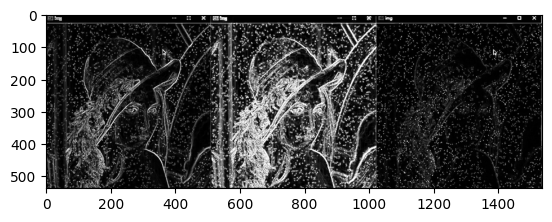

In [36]:
plt.imshow(res, cmap='gray')